In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Separating Input and Mask

In [2]:
def split_image(image):
    ''' This function takes and image and splits is into corresponding input image and mask.
    Parameters:
        image: PIL Image; Image to be split.
    Returns:
        input_image: numpy array; Separated input image.
        mask_image: numpy array; Separated mask image.
    '''
    image = np.array(image)
    input_image, mask_image = image[:,:256,:] , image[:,256:,:]
    return input_image, mask_image

Training set size:  2975
Validation set size:  500
Shape of image:  (256, 512, 3)


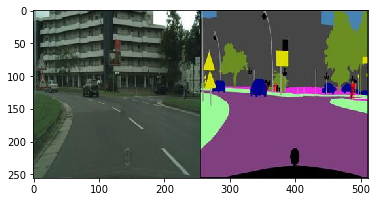

In [3]:
data_dir = os.path.join("D:\Projects\Semantic Segmentation\Backup\cityscapes_data")   
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

train_name_list = os.listdir(train_dir)
val_name_list = os.listdir(val_dir)

print("Training set size: ", len(train_name_list))
print("Validation set size: ", len(val_name_list))

example_img_path = os.path.join(train_dir, train_name_list[0])
example_img = Image.open(example_img_path).convert("RGB")
example_img = np.array(example_img)
print("Shape of image: ", example_img.shape)
plt.imshow(example_img)

In [4]:
CREATE_TRAIN_DATA = "NO"

if CREATE_TRAIN_DATA is "YES":
    for train_image_name in train_name_list:
        train_image = os.path.join(train_dir, train_image_name)
        train_image = Image.open(train_image).convert("RGB")
        input_image, mask_image = split_image(train_image)

        train_input_filename = train_image_name 
        train_input_filename = train_input_filename.replace(".jpg","_input.jpg")
        path_train_input = "D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\train_input\\"
        input_image = Image.fromarray(np.uint8(input_image)).convert('RGB')
        input_image.save( path_train_input + train_input_filename, "JPEG" )

        train_mask_filename = train_image_name 
        train_mask_filename = train_mask_filename.replace(".jpg","_mask.jpg")
        path_train_mask = "D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\train_mask\\"
        mask_image = Image.fromarray(np.uint8(mask_image)).convert('RGB')
        mask_image.save(path_train_mask + train_mask_filename, "JPEG")

    print("Done creating training data.")

In [5]:
CREATE_VAL_DATA = "NO"

if CREATE_VAL_DATA is "YES":
    for val_image_name in val_name_list:
        val_image = os.path.join(val_dir, val_image_name)
        val_image = Image.open(val_image).convert("RGB")
        input_image, mask_image = split_image(val_image)

        val_input_filename = val_image_name 
        val_input_filename = val_input_filename.replace(".jpg","_input.jpg")
        path_val_input = "D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\val_input\\"
        input_image = Image.fromarray(np.uint8(input_image)).convert('RGB')
        input_image.save( path_val_input + val_input_filename, "JPEG" )

        val_mask_filename = val_image_name 
        val_mask_filename = val_mask_filename.replace(".jpg", "_mask.jpg")
        path_val_mask = "D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\val_mask\\"
        mask_image = Image.fromarray(np.uint8(mask_image)).convert('RGB')
        mask_image.save(path_val_mask + val_mask_filename, "JPEG")

    print("Done creating val data.")

# Converting Masks to Nearest Color Neighbors

No. of unique colors after shifting to nearest neighbors:  17782
Shape of image:  (256, 256, 3)


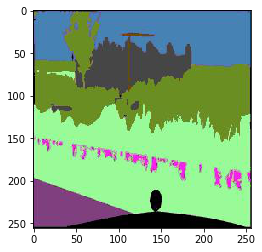

In [6]:
mask_path = os.path.join("D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\train_mask\\153_mask.jpg")
label = Image.open(mask_path).convert("RGB")
label = np.array(label)
plt.imshow(label)
unique_color__ = np.unique(label.reshape(-1, label.shape[2]), axis=0)
print("No. of unique colors after shifting to nearest neighbors: ", len(unique_color__))
print("Shape of image: ", label.shape)

In [7]:
# Colour List
from collections import namedtuple

Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

In [8]:
#Colour List
color_palette = [label.color for label in labels]
print("List of valid colors: ")
print(color_palette)
color_palette_np_array = np.array(color_palette)
print()
print("List of valid colors in numpy array format: ")
print(color_palette_np_array)

List of valid colors: 
[(0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (111, 74, 0), (81, 0, 81), (128, 64, 128), (244, 35, 232), (250, 170, 160), (230, 150, 140), (70, 70, 70), (102, 102, 156), (190, 153, 153), (180, 165, 180), (150, 100, 100), (150, 120, 90), (153, 153, 153), (153, 153, 153), (250, 170, 30), (220, 220, 0), (107, 142, 35), (152, 251, 152), (70, 130, 180), (220, 20, 60), (255, 0, 0), (0, 0, 142), (0, 0, 70), (0, 60, 100), (0, 0, 90), (0, 0, 110), (0, 80, 100), (0, 0, 230), (119, 11, 32), (0, 0, 142)]

List of valid colors in numpy array format: 
[[  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [  0   0   0]
 [111  74   0]
 [ 81   0  81]
 [128  64 128]
 [244  35 232]
 [250 170 160]
 [230 150 140]
 [ 70  70  70]
 [102 102 156]
 [190 153 153]
 [180 165 180]
 [150 100 100]
 [150 120  90]
 [153 153 153]
 [153 153 153]
 [250 170  30]
 [220 220   0]
 [107 142  35]
 [152 251 152]
 [ 70 130 180]
 [220  20  60]
 [255   0   0]
 [  0   0 142]
 [  0   0  70]
 [ 

In [9]:
from scipy.spatial import cKDTree
def mask_to_actual_mask(mask_path, testing=False):
    '''This function takes each pixel and converts it to the nearest valid color.
    Parameters:
        mask_path: String; The path of the mask to be converted.
        testing: Boolean; Shows output of each step when set to true.
    Returns:
        out_img: numpy array; Mask converted to valid colored pixels.
    '''
    label = Image.open(mask_path).convert("RGB")
    label = np.array(label)
    out_img = color_palette_np_array[cKDTree(color_palette_np_array).query(label,k=1)[1]]

    if testing is True:
        plt.imshow(out_img)
        plt.show()

        print("Mapping color to closest member of a list of colors:")
        print("No. of unique colors before shifting to nearest neighbors: ", 
              len(np.unique(label.reshape(-1, label.shape[2]), axis=0)))
        print()

        unique_color__ = np.unique(out_img.reshape(-1, out_img.shape[2]), axis=0)

        print("No. of unique colors after shifting to nearest neighbors: ", len(unique_color__))
    return out_img

In [10]:
data_dir = os.path.join("D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data")   
train_mask_dir = os.path.join(data_dir, "train_mask")
val_mask_dir = os.path.join(data_dir, "val_mask")

train_name_list = os.listdir(train_mask_dir)
val_name_list = os.listdir(val_mask_dir)

print("Training set size: ", len(train_name_list))
print("Validation set size: ", len(val_name_list))

Training set size:  2975
Validation set size:  500


In [11]:
FIX_TRAIN_MASK = "NO"
train_mask_actual_dir = os.path.join(data_dir, "train_mask_corrected")
if FIX_TRAIN_MASK is "YES":
    for train_mask_filename in train_name_list:
        train_mask_path = os.path.join(train_mask_dir, train_mask_filename)
        train_mask_actual = mask_to_actual_mask(train_mask_path)
        
        train_mask_actual = Image.fromarray(np.uint8(train_mask_actual)).convert('RGB')

        train_mask_actual_path = os.path.join(train_mask_actual_dir, train_mask_filename)
        train_mask_actual.save(train_mask_actual_path, "PNG")

    print("Done fixing mask data.")

No. of unique colors after shifting to nearest neighbors:  21
Shape of image:  (256, 256, 3)


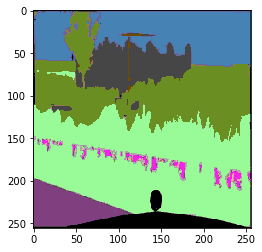

In [12]:
mask_path = os.path.join("D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\train_mask_corrected\\153_mask.jpg")
label = Image.open(mask_path).convert("RGB")
label = np.array(label)
plt.imshow(label)
unique_color__ = np.unique(label.reshape(-1, label.shape[2]), axis=0)
print("No. of unique colors after shifting to nearest neighbors: ", len(unique_color__))
print("Shape of image: ", label.shape)

In [13]:
FIX_VAL_MASK = "NO"
val_mask_actual_dir = os.path.join(data_dir, "val_mask_corrected")
if FIX_VAL_MASK is "YES":
    for val_mask_filename in val_name_list:
        val_mask_path = os.path.join(val_mask_dir, val_mask_filename)
        val_mask_actual = mask_to_actual_mask(val_mask_path)
        
        val_mask_actual = Image.fromarray(np.uint8(val_mask_actual)).convert('RGB')

        val_mask_actual_path = os.path.join(val_mask_actual_dir, val_mask_filename)
        val_mask_actual.save(val_mask_actual_path, "PNG")

    print("Done fixing val mask data.")

No. of unique colors after shifting to nearest neighbors:  19


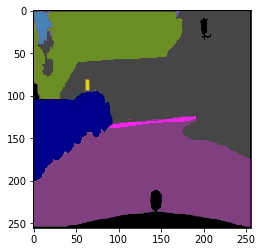

In [14]:
mask_path = os.path.join("D:\\Projects\\Semantic Segmentation\\Notebooks\\cityscapes_data\\val_mask_corrected\\296_mask.jpg")
label = Image.open(mask_path).convert("RGB")
label = np.array(label)
plt.imshow(label)
unique_color__ = np.unique(label.reshape(-1, label.shape[2]), axis=0)
print("No. of unique colors after shifting to nearest neighbors: ", len(unique_color__))

# Creating the one-hot mappings

In [15]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
def create_one_hot_mask(label_1):
    '''This creates a one-hot encoding containing the indices of the valid colors in each pixel position.
    Parameters:
        label_1: numpy array; The mask to be converted to one-hot format.
    Returns:
        one_hot_mask: tf tensor; The mask converted to one-hot format.
    '''
    one_hot_map = []
    for color in color_palette:
        class_map = tf.reduce_all(tf.equal(label_1, color), axis=-1)
        one_hot_map.append(class_map)

    one_hot_map = tf.stack(one_hot_map, axis=-1)
    one_hot_map = tf.cast(one_hot_map, tf.float32)

    one_hot_mask = tf.argmax(one_hot_map, axis=-1)

    return one_hot_mask

In [16]:
label_one_hot = create_one_hot_mask(label)
print("Shape of image: ", label_one_hot.shape)
print(label_one_hot)

Shape of image:  (256, 256)
tf.Tensor(
[[ 0 27  0 ...  0  0  0]
 [27 11 11 ... 11 11  0]
 [27 12 12 ... 11 11  0]
 ...
 [ 6  7  7 ...  7  7  6]
 [27 11 11 ... 11 11 27]
 [ 0  0  0 ...  0  6  0]], shape=(256, 256), dtype=int64)


In [17]:
#Creating one-hot tensor of shape (h, w, num_channels). This mask format is not supported by Pytorch while training
mask_one_hot = to_categorical(label_one_hot, num_classes = 35)
print("Shape of image: ", mask_one_hot.shape)
print(mask_one_hot)

Shape of image:  (256, 256, 35)
[[[1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  [1. 0. 0. ... 0. 0. 0.]
  ...
  [1. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [1. 

## Resources:
1. Why we should not save labels as JPG: https://stackoverflow.com/questions/57699309/ground-truth-image-to-one-hot-encoded-array-semantic-segmentation
2. Valid color list collected from: https://github.com/mcordts/cityscapesScripts/blob/master/cityscapesscripts/helpers/labels.py